# Proyek Analisis Data: Bike Share
- **Nama:** Shafaa Dimitri
- **Email:** dimitrishafaa@gmail.com
- **ID Dicoding:** shafaadimitri

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada musim apa pengguna sepeda bersama cenderung lebih dominan?
- Pertanyaan 2: Apakah kecepatan udara memengaruhi jumlah pengguna?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Akan dimuat data day.csv dan hour.csv

In [2]:
day = pd.read_csv("/content/day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv("/content/hour.csv")
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak terdapat adanya perbedaan jumlah maupun tipe data pada kedua data diatas.

In [6]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
print("Jumlah duplikasi: ", hour.duplicated().sum())


Jumlah duplikasi:  0


Karena juga tidak terdapat data yang terduplikasi, selanjutnya akan dicek ringkasan parameter statistik data.

In [12]:
print("Jumlah duplikasi: ", day.duplicated().sum())

day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Rangkuman: Tidak terdapat missing value baik pada hour.csv dan day.csv. Tidak terdapat inaccurate value pada kolom yang ada. Sehingga, tidak diperlukan proses cleaning data.

## *Exploratory Data Analysis (EDA)*



### Explore day.csv & hour.csv

In [107]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [108]:
hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [109]:
day.groupby(by="season").agg({
    "cnt": "max",
    "casual": ["max", "min", "mean", "std"]
})

cnt casual                              
         max    max  min         mean         std
season                                           
1       7836   3155    9   334.928177  387.655561
2       8362   3410  120  1106.097826  737.590829
3       8714   3160  118  1202.611702  595.975032
4       8555   3031    2   729.112360  606.318118

In [110]:
hour.groupby(by="season").agg({
    "cnt": "max",
    "casual": ["max", "min", "mean", "std"]
})

cnt casual                          
        max    max min       mean        std
season                                      
1       801    367   0  14.290901  27.463006
2       957    361   0  46.160581  57.455803
3       977    350   0  50.287144  51.751916
4       967    362   0  30.666824  46.034058

In [111]:
day.groupby(by="season").cnt.nunique().sort_values(ascending=False)


season
3    188
2    182
1    179
4    176
Name: cnt, dtype: int64

Berdasarkan pivot table diatas, diketahui bahwa pengguna terbanyak adalah pengguna yang bersepeda bersama pada musim kemarau.

Selanjutnya akan dicari tahu terkait dengan pengaruh kecepatan udara dengan pengguna.

In [112]:
day.groupby(by="season").agg({
    "cnt": "max",
    "windspeed": ["max", "min", "mean", "std"]
})

cnt windspeed                              
         max       max       min      mean       std
season                                              
1       7836  0.507463  0.045408  0.214537  0.086439
2       8362  0.388067  0.065929  0.203507  0.071629
3       8714  0.375617  0.064071  0.172095  0.059526
4       8555  0.422275  0.022392  0.171995  0.081565

In [113]:
hour.groupby(by="season").agg({
    "cnt": "max",
    "workingday": ["max", "min", "mean", "std"]
})

cnt workingday                        
        max        max min      mean       std
season                                        
1       801          1   0  0.658652  0.474218
2       957          1   0  0.695396  0.460292
3       977          1   0  0.698621  0.458908
4       967          1   0  0.676749  0.467773

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada musim apa pengguna sepeda bersama cenderung lebih dominan?

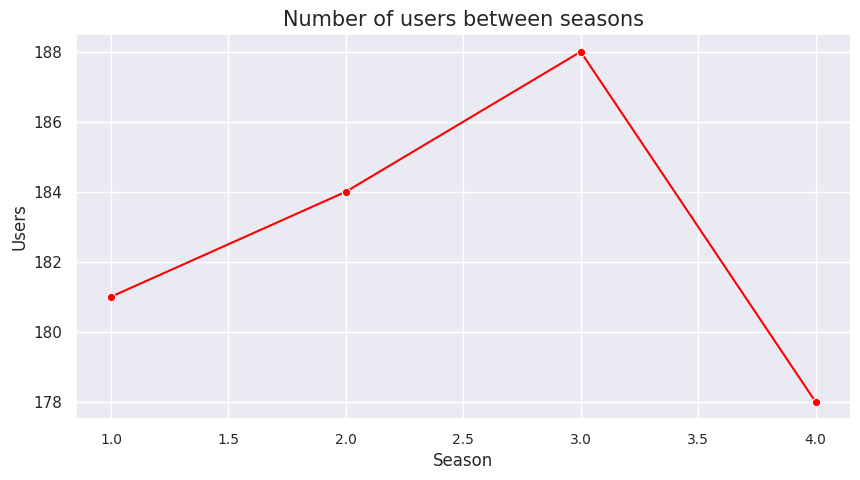

In [103]:
seasonsort = day.groupby(by="season").size().reset_index(name="cnt")

plt.figure(figsize=(10, 5))

sns.lineplot(
    y="cnt",
    x="season",
    data=seasonsort.sort_values(by="season"),
    marker='o',
    color='red'
)
plt.title("Number of users between seasons", loc="center", fontsize=15)
plt.ylabel("Users")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=10)
plt.show()

Keterangan:
1 (Musim semi)
,2 (Musim panas)
,3 (Musim gugur)
,4 (Musim dingin).



Berikut adalah line chart yang dibuat berdasarkan jumlah pengguna dengan musim yang ada.

### Pertanyaan 2:

Apakah kecepatan udara memengaruhi jumlah pengguna?

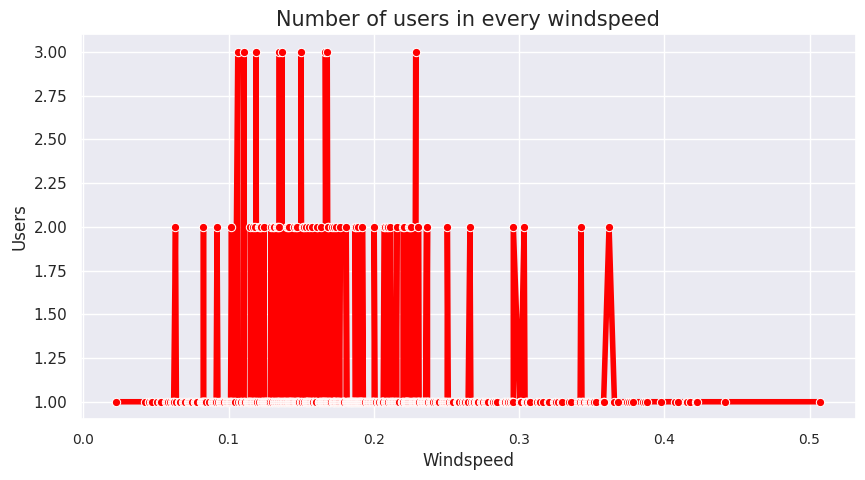

In [105]:
windspeeds = day.groupby(by="windspeed").size().reset_index(name="cnt")

plt.figure(figsize=(10, 5))

sns.lineplot(
    y="cnt",
    x="windspeed",
    data=windspeeds.sort_values(by="windspeed"),
    marker='o',
    color='red',
    linewidth=4
)
plt.title("Number of users in every windspeed", loc="center", fontsize=15)
plt.ylabel("Users", fontsize=12)
plt.xlabel("Windspeed", fontsize=12)
plt.tick_params(axis='x', labelsize=10)
plt.show()

Berikut merupakan sebuah line chart untuk angka pengguna pada setiap kecepatan angin yang ada.

## Conclusion

- Conclution pertanyaan 1,
Berdasarkan data dan line chart yang terlampir, dapat disimpulkan bahwa pengguna lebih dominan menggunakan sepeda bersama pada musim gugur dan turun secara signifikan pada musim dingin. Musim gugur menjadi titik puncak dalam line chart telah disajikan.
- Conclution pertanyaan 2,
Berdasarkan data yang ada, dapat disimpulkan bahwa kecepatan udara mmemengaruhi pengguna. Pengguna sepeda bersama cenderung menggunakan rental pada kecepatan udara sebesar 0.1 hingga 0.4 mph, selebihnya secara signifikan pengguna berkurang. Di sisi lain, pengguna justru paling banyak menggunakan sepeda bersama pada saat kecepatan udara yang tenang sekitar 0.1 hingga 0.2 mph.

In [119]:
day.to_csv("dayh.csv", index=False)